# HW3 Problem #2: Linear Regression

## Due Sunday May 7, at 11:55pm

## However:  it is strongly recommended you master this material before the Midterm on Saturday May 6.  The Midterm will cover this material.

<hr style="height: 30px; background-color: gray;"/>

# Tutorial on Linear Regression -- adapted from [ISL] Ch.3

For more information on the steps here, read the "Lab" section in Chapter 3 of [ISL].

Chapter 3 in the [ESL] text covers more material and is more elegantly written, but is also very compact and takes time to read.

## Load all libraries we need

In [13]:
not.installed = function(package_name)  !is.element(package_name, installed.packages()[,1])

if (not.installed("MASS")) install.packages("MASS")
if (not.installed("ISLR")) install.packages("ISLR")

library(MASS)
library(ISLR)

## Simple Linear Regression

This "lab" uses the Boston dataset in MASS, a famous dataset about housing prices in Boston.

The ISL text explains better what the variable names refer to, but of particular importance in the examples here:

<b>medv</b> = median home value

<b>lstat</b> = low socioeconomic status.


In [27]:
print(names(Boston))

print(head(Boston))

 [1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"   
     crim zn indus chas   nox    rm  age    dis rad tax ptratio  black lstat
1 0.00632 18  2.31    0 0.538 6.575 65.2 4.0900   1 296    15.3 396.90  4.98
2 0.02731  0  7.07    0 0.469 6.421 78.9 4.9671   2 242    17.8 396.90  9.14
3 0.02729  0  7.07    0 0.469 7.185 61.1 4.9671   2 242    17.8 392.83  4.03
4 0.03237  0  2.18    0 0.458 6.998 45.8 6.0622   3 222    18.7 394.63  2.94
5 0.06905  0  2.18    0 0.458 7.147 54.2 6.0622   3 222    18.7 396.90  5.33
6 0.02985  0  2.18    0 0.458 6.430 58.7 6.0622   3 222    18.7 394.12  5.21
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7


In [26]:
lm.fit = lm(medv ~ lstat, data=Boston)

##  attach(Boston)   ## bad style
##  lm.fit=lm(medv~lstat)

#print(lm.fit)

print(summary(lm.fit))

#print(names(lm.fit))

#print(coef(lm.fit))

#print(confint(lm.fit))


Call:
lm(formula = medv ~ lstat - 1, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.495  -1.853   8.141  17.564  48.059 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
lstat  1.12210    0.05535   20.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.09 on 505 degrees of freedom
Multiple R-squared:  0.4486,	Adjusted R-squared:  0.4476 
F-statistic: 410.9 on 1 and 505 DF,  p-value: < 2.2e-16



        fit      lwr       upr
1  5.610521  5.06676  6.154282
2 11.221042 10.13352 12.308564
3 16.831562 15.20028 18.462846
        fit       lwr      upr
1  5.610521 -29.92800 41.14904
2 11.221042 -24.32996 46.77204
3 16.831562 -18.74022 52.40335


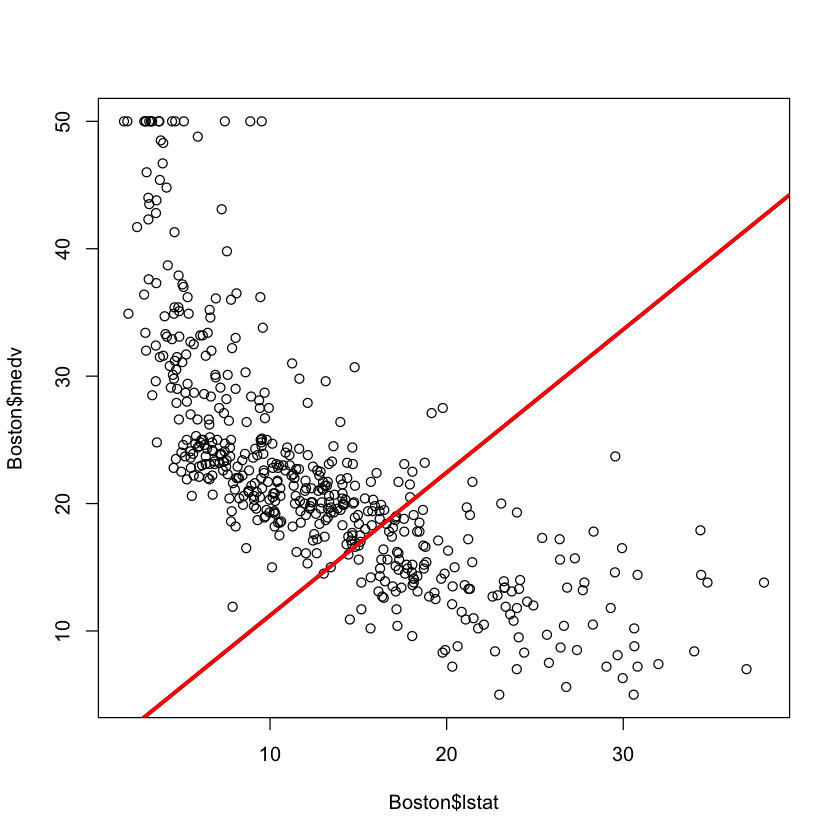

In [28]:
print( predict(lm.fit, data.frame(lstat=(c(5,10,15))), interval="confidence") )

print( predict(lm.fit, data.frame(lstat=(c(5,10,15))), interval="prediction") )

plot(Boston$lstat, Boston$medv)

#  The following are equivalent -- they add the model to the current plot (as a line)

abline(lm.fit)
abline(lm.fit,lwd=3)
abline(lm.fit,lwd=3,col="red")

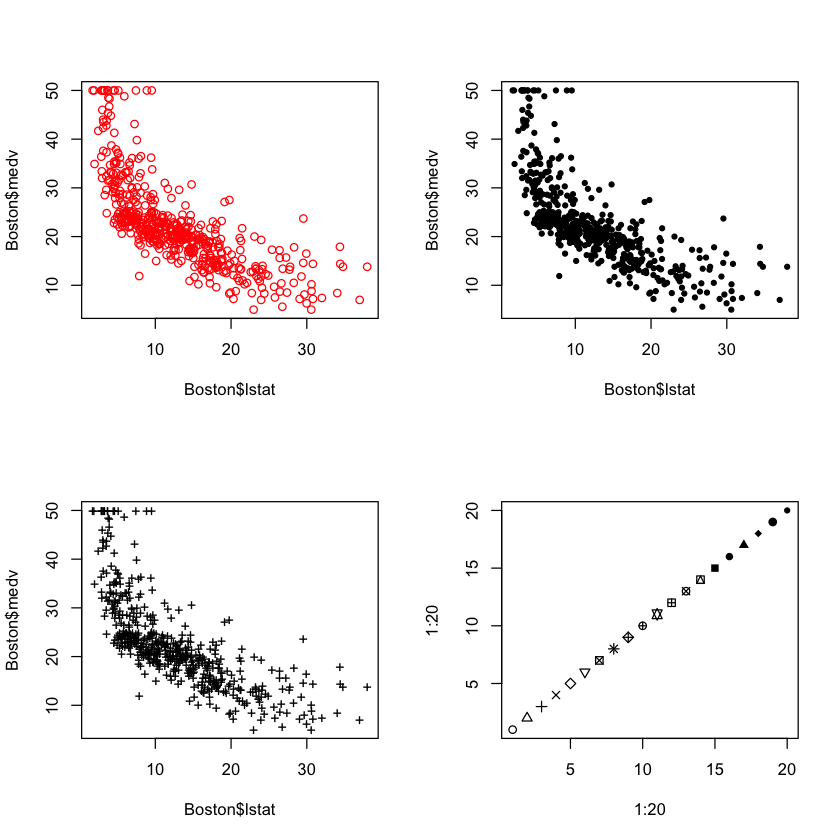

In [26]:
opar = par(mfrow=c(2,2))

plot(Boston$lstat, Boston$medv, col="red")
plot(Boston$lstat, Boston$medv, pch=20)
plot(Boston$lstat, Boston$medv, pch="+")
plot(1:20,1:20,pch=1:20)

par(opar)

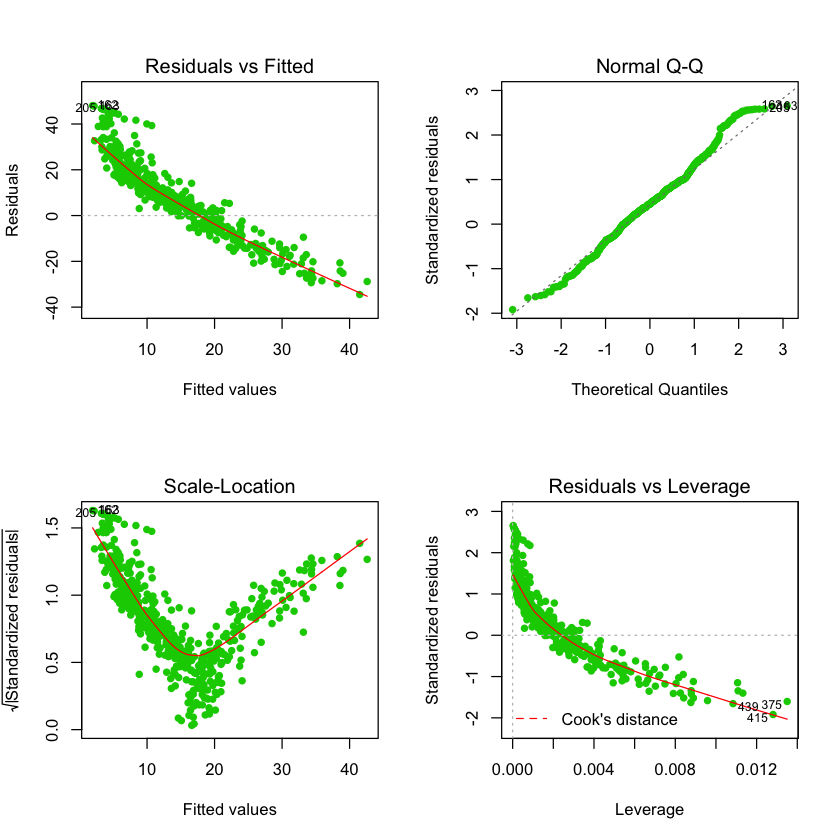

375 
375 


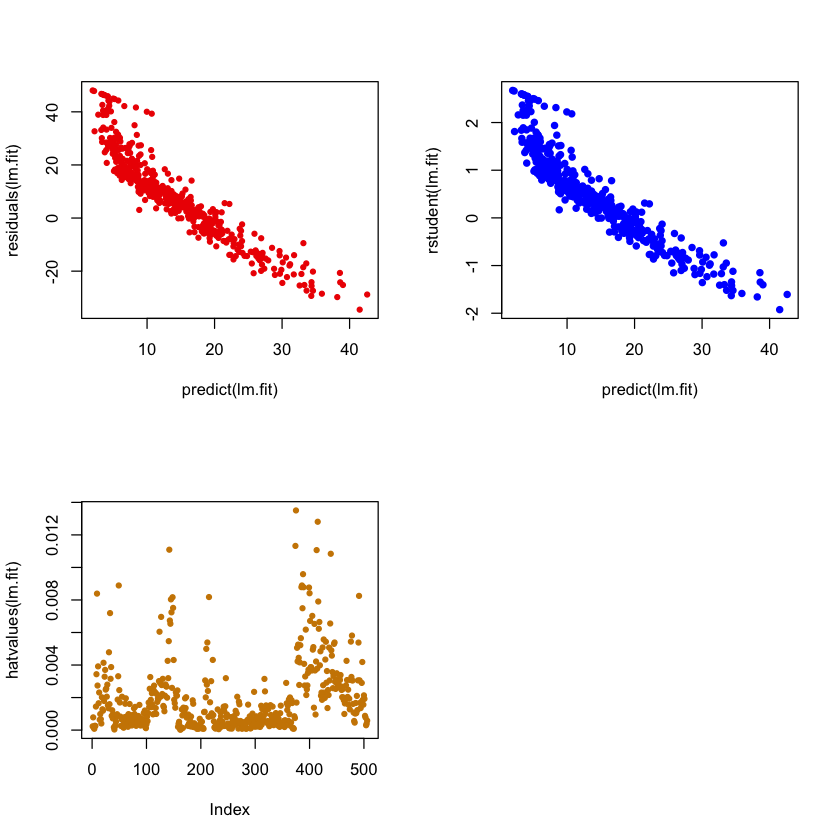

In [29]:
opar = par(mfrow=c(2,2))

plot(lm.fit, col="green3", pch=16)  #  generates 4 plots

plot(predict(lm.fit), residuals(lm.fit), col="red2", pch=20)

plot(predict(lm.fit), rstudent(lm.fit), col="blue1", pch=16)

plot(hatvalues(lm.fit), col="orange3", pch=20)

par(opar)

print( which.max(hatvalues(lm.fit)) )

## Multiple Linear Regression

(i.e., multiple x-variables, not just one)

In [30]:
lm.fit = lm(medv ~ lstat + age, data=Boston)
print( summary(lm.fit) )


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16



In [29]:
lm.fit = lm(medv ~ ., data=Boston)
print( summary(lm.fit) )


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [30]:
lm.fit1 = lm(medv ~ . - age, data=Boston)
print( summary(lm.fit1) )


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1

In [31]:
lm.fit1 = update(lm.fit, ~ . - age, data=Boston)

print( summary(lm.fit1) )


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + dis + 
    rad + tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.

## Interaction Terms (adding features that are not linear in the initial set of variables)

In [32]:
print( summary(lm( medv ~ lstat * age, data=Boston)) )


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16



## Nonlinear Transformations of the Predictors

In [33]:
lm.fit2 = lm(medv ~ lstat + I(lstat^2), data=Boston )

print( summary(lm.fit2) )

lm.fit = lm(medv ~ lstat, data=Boston)
# note that lm.fit2 contains all variables in lm.fit

print( anova(lm.fit,lm.fit2) )


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16

Analysis of Variance Table

Model 1: medv ~ lstat
Model 2: medv ~ lstat + I(lstat^2)
  Res.Df   RSS Df Sum of Sq     F    Pr(>F)    
1    504 19472                                 
2    503 15347  1    4125.1 135.2 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [34]:
lm.fit5 = lm(medv ~ poly(lstat,5), data=Boston)  # 5-th degree polynomial fit

print( summary(lm.fit5) )


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16



In [35]:
print( summary(lm(medv ~ log(rm), data=Boston)) )  # logarithmic transform


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16



<hr style="height: 30px; background-color: gray;"/>

# Doing Linear Regression using only Linear Algebra

The linear regression coefficients $\boldsymbol{w}$ can be obtained directly from the least-squares solution:
$\boldsymbol{w} ~~=~~ (X'\,X)^{-1} \; X' \; \boldsymbol{y} .$

All of the computations above can be performed with this formula.

In [36]:
y = Boston$medv

X_ = cbind( 1, Boston$lstat )

# In the X matrix, one column is the constant 1 (for an intercept), the other is lstat.

# equivalent construction of X using R constructors and matrix assignment:

X_ = matrix(1, nrow=nrow(Boston), ncol=2)
X_[,2] = Boston$lstat

Xt_X = t(X_) %*% X_
Xt_y = t(X_) %*% y

w = solve( Xt_X, Xt_y )  #  the least squares solution for the regression coefficients

cat("\n\nregression_coefficients:\n")
print(w)

for_comparison = lm( y ~ X_ - 1 )$coefficients

cat("\n\nlm coefficients for comparison:\n")
print(for_comparison)




regression_coefficients:
           [,1]
[1,] 34.5538409
[2,] -0.9500494


lm coefficients for comparison:
       X_1        X_2 
34.5538409 -0.9500494 


## Implementing a quadratic polynomial fit (using linear algebra)

In [37]:
X_ = cbind( 1, Boston$lstat, Boston$lstat^2 )

# one column is the constant 1 (for an intercept), the other two are lstat and lstat^2
# equivalent construction of X using R constructors and matrix assignment:

X_ = matrix(1, nrow=nrow(Boston), ncol=3)
X_[,2] = Boston$lstat
X_[,3] = Boston$lstat^2

Xt_X = t(X_) %*% X_
Xt_y = t(X_) %*% y

w = solve( Xt_X, Xt_y )  #  the least squares solution

cat("\n\nregression_coefficients:\n")
print(w)

for_comparison = lm( y ~ X_ - 1 )$coefficients

# lm(medv ~ lstat + I(lstat^2), data=Boston )

cat("\n\nlm coefficients for comparison:\n")
print(for_comparison)



regression_coefficients:
            [,1]
[1,] 42.86200733
[2,] -2.33282110
[3,]  0.04354689


lm coefficients for comparison:
        X_1         X_2         X_3 
42.86200733 -2.33282110  0.04354689 


##With linear algebra we can even do Interaction Terms as above

--- adding features that are not linear in the initial set of variables.

In [38]:
# the product lstat * age is an "interaction" (nonlinear function) of the variables:

X_ = cbind( 1, Boston$lstat, Boston$age, (Boston$lstat * Boston$age) )

# one column of X is the constant 1 (for an intercept), the other two are lstat and age

Xt_X = t(X_) %*% X_
Xt_y = t(X_) %*% y

w = solve( Xt_X, Xt_y )  #  the least squares solution

cat("\n\nregression_coefficients:\n")
print(w)

for_comparison = lm( medv ~ lstat * age, data=Boston )$coefficients

cat("\n\nlm coefficients for comparison:\n")
print(for_comparison)




regression_coefficients:
              [,1]
[1,] 36.0885359346
[2,] -1.3921168406
[3,] -0.0007208595
[4,]  0.0041559518


lm coefficients for comparison:
  (Intercept)         lstat           age     lstat:age 
36.0885359346 -1.3921168406 -0.0007208595  0.0041559518 


# OK!  Finally Questions for you to Answer!

# PART A

## Linear Regression and Ridge Regression

Apparently data science job interviewers sometimes ask about "Ridge Regression" to see if candidates really know regression.
Ridge Regression is really almost exactly the same thing as ordinary Linear Regression,
but penalizes large coefficient values (with a weight constant $\lambda$ used in the penalty).
After you see this is just a slight modification of Linear Regression,
you have a deeper understanding of it.

By the way:  adding this penalty is called <b>regularization</b>
(you are "regularizing" the regression objective function to respect other concerns).
For some reason, just knowing this "regularization" term can be valuable.

As noted above, the linear regression coefficients $\boldsymbol{w}$ are defined by

$\boldsymbol{w} ~~=~~ (X'\,X)^{-1} \; X' \; \boldsymbol{y}$

In <b>Ridge Regression</b>, this is simply generalized to include a <b>regularization term</b> with a parameter $\lambda$:

$\boldsymbol{w} ~~=~~ (X'\,X \;+\; \lambda\,I)^{-1} \; X' \; \boldsymbol{y}$

Increasing $\lambda$ has the effect of reducing the scale of the regression coefficients:

In [75]:
y = Boston$medv

X_ = as.matrix( subset(Boston, select = -medv) )

print(X_)

Xt_X = t(X_) %*% X_
Xt_y = t(X_) %*% y

minimum_lambda_value = 0
maximum_lambda_value = 100 ##  norm( Xt_X ) / 100000
number_of_lambda_values = 101

lambda_values = seq( minimum_lambda_value, maximum_lambda_value, length = number_of_lambda_values )

n = nrow(X_)
p = ncol(X_)

# keep track of all coefficient values -- for each value of lambda -- in a matrix:
coefficient_values_for_each_lambda = matrix(0, nrow=number_of_lambda_values, ncol=p)

colnames(coefficient_values_for_each_lambda) = colnames(X_)

I_p = diag(rep(1,p))  # pxp identity matrix  (rep(1,p) = a sequence with "1" repeated p times)

for (i in 1:number_of_lambda_values) {
    w = solve(  (Xt_X  +  I_p * lambda_values[i]),  Xt_y )
    coefficient_values_for_each_lambda[i,] = w
}


range = apply(coefficient_values_for_each_lambda,2,range)
p = ncol(range)
largest_range = 0
col_index = 0
for (i in 1:p){
    if(abs(max(test[,i])-min(test[,i])) > largest_range){
        largest_range = abs(max(test[,i])-min(test[,5]))
        col_index = i
    }
}
print(col_index)

#print(test)
#print(abs(max(test[,5])-min(test[,5])))


    
#colors = rainbow( p, start=0.5, end=0.1 )  # generate p different colors, using hues from cyan (0.5) to orange (0.1)
              
# plot( c(), c(), type="n",
#      main="(ridge) regression coefficients, as a function of lambda",
#      xlab="lambda", ylab="coefficient value",
#      xlim=range(lambda_values)*1.02,
#      ylim=range(coefficient_values_for_each_lambda) )

# for (j in 1:p) {
#     points( lambda_values, coefficient_values_for_each_lambda[,j],
#            type="o", pch=20, cex=0.5, col=colors[j] )
#     text( max(lambda_values), coefficient_values_for_each_lambda[number_of_lambda_values,j],
#          colnames(X_)[j], pos=4, cex=0.75, col=colors[j] )  # put name of each variable at the end
# }


        crim    zn indus chas    nox    rm   age     dis rad tax ptratio  black
1    0.00632  18.0  2.31    0 0.5380 6.575  65.2  4.0900   1 296    15.3 396.90
2    0.02731   0.0  7.07    0 0.4690 6.421  78.9  4.9671   2 242    17.8 396.90
3    0.02729   0.0  7.07    0 0.4690 7.185  61.1  4.9671   2 242    17.8 392.83
4    0.03237   0.0  2.18    0 0.4580 6.998  45.8  6.0622   3 222    18.7 394.63
5    0.06905   0.0  2.18    0 0.4580 7.147  54.2  6.0622   3 222    18.7 396.90
6    0.02985   0.0  2.18    0 0.4580 6.430  58.7  6.0622   3 222    18.7 394.12
7    0.08829  12.5  7.87    0 0.5240 6.012  66.6  5.5605   5 311    15.2 395.60
8    0.14455  12.5  7.87    0 0.5240 6.172  96.1  5.9505   5 311    15.2 396.90
9    0.21124  12.5  7.87    0 0.5240 5.631 100.0  6.0821   5 311    15.2 386.63
10   0.17004  12.5  7.87    0 0.5240 6.004  85.9  6.5921   5 311    15.2 386.71
11   0.22489  12.5  7.87    0 0.5240 6.377  94.3  6.3467   5 311    15.2 392.52
12   0.11747  12.5  7.87    0 0.5240 6.0

## Your job is to find the regression coefficient that changes the most (has the maximum range) over the 101 lambda values between 0 and 100.

Each coefficient has a range of values (obtained over all 101 lambda values between 0 and 100).
Your job is to find the coefficient with maximum range.

If each coefficient has range

    [min_value, max_value]
    
your job is to find the one for which the difference

    max_value - min_value

is maximum.  You should print the <b>column number</b> (variable number) of this coefficient.

For the Boston dataset, the <b>nox</b> variable has largest range (=3.024...),
and it is the 5th column, so your program should print:
<pre>
5
</pre>

In [40]:
# compute the range of coefficient values  (over all values of lambda considered)
max_coefficient_value = apply( coefficient_values_for_each_lambda, 2, max )
min_coefficient_value = apply( coefficient_values_for_each_lambda, 2, min )

coefficient_value_range = max_coefficient_value - min_coefficient_value
cat("\n\ncoefficient value range:\n")
print( coefficient_value_range )



coefficient value range:
        crim           zn        indus         chas          nox           rm 
0.0009081501 0.0162711175 0.0092224909 2.0739083282 3.0243776572 1.3872022620 
         age          dis          rad          tax      ptratio        black 
0.0287494208 0.2512763505 0.0087652364 0.0007151487 0.2406204809 0.0032294503 
       lstat 
0.1148510891 


# PART B

## Find the observations that have greatest influence on the Regression coefficients

Suppose the $n \times p$ dataset we have is $X$.

Let $\bar{\boldsymbol{x}}$ be the $1 \times p$ row vector of column means of $X$,
so its $j$-th entry is the average of the $j$-th column of $X$.

We want to determine the influence of the $i$-th observation $\boldsymbol{x}_i$ (row) of $X$
on either the regression coefficients ($\boldsymbol{w}$)
or the predicted $y$-values ($\hat{\boldsymbol{y}} \,=\, X\,\boldsymbol{w}$).

<b>THERE ARE NO INTERCEPTS IN THIS PROBLEM</b>:  $\boldsymbol{w}$ only contains coefficients for columns in $X$.

Define the following:

$X_{(i)}$ is the data with its $i$-th row ($\boldsymbol{x}_i$) <b>omitted</b>.

$\boldsymbol{y}_{(i)}$ is the $y$-vector with its $i$-th value <b>omitted</b>.

$\boldsymbol{w}_{(i)}$ are the regression coefficients computed for $X_{(i)}$ and $\boldsymbol{y}_{(i)}$;
i.e.,  $\boldsymbol{w}_{(i)} \;=\; ({X_{(i)}}' X_{(i)})^{-1} ~ {X_{(i)}}' ~ \boldsymbol{y}_{(i)}$.

$\hat{\boldsymbol{y}}_{(i)} \;=\; X \,\boldsymbol{w}_{(i)}$ --- the  $y$ values predicted from the coefficients $\boldsymbol{w}_{(i)}$.


People often define two measures of influence of the $i$-th observation:

(1) $Leverage_i ~~ = ~~ (\boldsymbol{x}_i - \bar{\boldsymbol{x}}) ~ C^{-1} ~ (\boldsymbol{x}_i - \bar{\boldsymbol{x}})'$,
where $C$ is the <b>covariance matrix</b> of $X$.

(2) $CookDistance_i ~~=~~ (\hat{\boldsymbol{y}} - \hat{\boldsymbol{y}}_{(i)})' ~ (\hat{\boldsymbol{y}} - \hat{\boldsymbol{y}}_{(i)})$.

Because

$(\hat{\boldsymbol{y}} - \hat{\boldsymbol{y}}_{(i)}) ~ = ~  X ~ ({\boldsymbol{w}} - {\boldsymbol{w}_{(i)}})$

the Cook distance measure is also a measure of influence of the $i$-th row on the regression coefficients $\boldsymbol{w}$.


Your job is to find the index $i$ of the rows ($\boldsymbol{x}_i$ and $\boldsymbol{y}_i$)
that maximize $Leverage_i$ and $CookDistance_i$.

For example, with the Boston data, the value of $i$ that maximizes $Leverage_i$ is 381:

In [91]:
X_ = subset(Boston, select = -medv) # all except the medv column

# X_ = subset( iris, select = -Species ) # all except the Species column

X_minus_Xbar = scale(X_, center=TRUE, scale=FALSE)

#print(X_minus_Xbar)


C_inverse = solve( cov(X_) )

Leverage = diag( (X_minus_Xbar) %*% C_inverse %*% t(X_minus_Xbar) )  ## very wasteful -- we just want the diagonal

i = which( Leverage == max(Leverage) )

cat("\n\nthe value of i that maximizes Leverage[i] is:\n")
cat(i, "\n")

print(Leverage)

# cat("\n\nLeverage[i] is:\n")
# print(Leverage[i])

#  cat("\n\nthe i-th row in X is:\n")
#  print( X_[i,] )








the value of i that maximizes Leverage[i] is:
381 
         1          2          3          4          5          6          7 
  7.548994   4.612111   4.972568   6.928668   7.137280   6.483444   6.058685 
         8          9         10         11         12         13         14 
 14.249835  25.702220  13.675178  16.843831  10.932134   7.847534   5.962962 
        15         16         17         18         19         20         21 
  6.360956   6.063612  10.296225   4.947724  10.953558   5.200512   8.239237 
        22         23         24         25         26         27         28 
  5.706603   7.001617   8.268697   6.822253   7.097494   6.756689   7.122331 
        29         30         31         32         33         34         35 
  7.573529   6.713671   8.777666   8.049037  16.561984   6.943615  10.459618 
        36         37         38         39         40         41         42 
  3.970416   3.893543   4.869480   6.780921  14.716633  15.553471  12.570933 
        43 

# That's it!  Now write an R function that does this for any numeric X matrix and y vector

Your R script can be an extension of this outline:

<pre>
Linear_Regression = function(X, y) {

    #  X is a nxp numeric matrix
    #  y = is a nx1 numeric vector

    cat( ... number of variable whose coefficient has the maximum range ..., "\n" )

    cat( ... the value of i that maximizes  Leverage[i] ..., "\n" )

    cat( ... the value of i that maximizes  CookDistance[i] ..., "\n" )
    
}
</pre>

# What your function's output should look like

If the Boston table above was given as input,
your program should print the following values:
<pre>
5
381
369
</pre>


As another test, with the built-in <tt>mtcars</tt> dataset, the output should look like this:
<pre>
6
9
29
</pre>

As usual, output values are always integers.

#  Before submitting it, test your function on the <tt>mtcars</tt> dataset


### 1. Try your function on the "mtcars" dataset.

As another test, with the <tt>mtcars</tt> dataset (which is a builtin dataset in R).

<pre>
   X = subset( mtcars, select = -mpg )
   y = subset( mtcars, select =  mpg )

   Linear_Regression(X,y)
</pre>

### 2. Also try your function on the "mtcars" dataset, after replacing the <tt>mpg</tt> column by <tt>1/mpg</tt>:

<pre>
   # inverted_mtcars = transform( mtcars, mpg = 1/mpg )  # this could be one way to do it

   X = subset( mtcars, select = -mpg )
   y = subset( mtcars, select =  mpg )
   y = 1/y

   Linear_Regression(X,y)
</pre>

## Upload to CCLE both your R function file <tt>LinearRegression.R</tt> and its output for these tests.

<!--
#  Before submitting it, test your function on two datasets:

### 1. Try your function on the "vowels" dataset.

<pre>
data(mtcars)

Linear_Regression( subset(mtcars, select=-mpg), subset(mtcars, select=mpg) )
##  'mpg', the first column, is a numeric value


</pre>

### 2. Try your function on the "spam" dataset.

<pre>
spam = read.csv("spam.csv", header=TRUE)  # spam.csv is included with this assignment

Linear_Regression( subset(spam, select=-is_spam), subset(mtcars, select=is_spam) )
</pre>

You can include your output for these two tests in your notebook here,
or in some separate file.
Submit this output along with the rest of your HW3 materials.

## Then:  Upload to CCLE both your R function file <tt>LinearRegression.R</tt> and its output for these two test datasets.
-->